#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [4]:
! conda list | grep mysql-connector-python
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import pandas as pd
import matplotlib.pyplot as plt

con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

mysql-connector-python    9.0.0                    pypi_0    pypi


1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [3]:
query = """
    SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
    FROM employees
    GROUP BY hire_year
    ORDER BY hire_year;
"""
df = pd.read_sql(query, con)
print(df)

/var/folders/h3/tf51715d0x9b9w1bsvw3gfr00000gn/T/ipykernel_25627/2114249683.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


    hire_year  employee_count
0        1985           35316
1        1986           36150
2        1987           33501
3        1988           31436
4        1989           28394
5        1990           25610
6        1991           22568
7        1992           20402
8        1993           17772
9        1994           14835
10       1995           12115
11       1996            9574
12       1997            6669
13       1998            4155
14       1999            1514
15       2000              13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

/var/folders/h3/tf51715d0x9b9w1bsvw3gfr00000gn/T/ipykernel_25627/4004538454.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


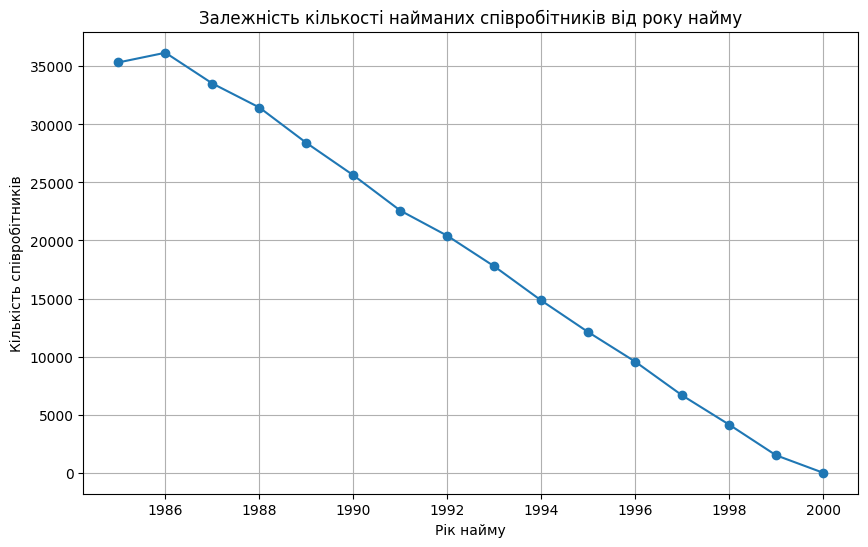

In [5]:
query = """
    SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
    FROM employees
    GROUP BY hire_year
    ORDER BY hire_year;
"""
df = pd.read_sql(query, con)

df.columns = ['Рік найму', 'Кількість співробітників']

df = df.sort_values(by='Рік найму')

plt.figure(figsize=(10, 6))
plt.plot(df['Рік найму'], df['Кількість співробітників'], marker='o')

plt.title('Залежність кількості найманих співробітників від року найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')

plt.grid(True)

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [7]:
query = """
    SELECT 
        TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration,
        from_date,
        to_date
    FROM 
        titles
    WHERE 
        title = 'Engineer'
        AND to_date != '9999-01-01';
"""

df_years = pd.read_sql(query, con)

print(df_years)

/var/folders/h3/tf51715d0x9b9w1bsvw3gfr00000gn/T/ipykernel_25627/3921863373.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(query, con)


       duration   from_date     to_date
0             9  1986-12-01  1995-12-01
1             5  1990-02-18  1995-02-18
2             8  1992-12-18  2000-12-18
3             8  1987-04-03  1995-04-03
4             5  1995-03-20  2001-03-19
...         ...         ...         ...
84015         9  1989-11-23  1998-11-23
84016         5  1989-07-30  1994-07-30
84017         0  1993-02-22  1993-10-27
84018         6  1996-05-13  2002-05-13
84019         4  1987-08-30  1992-08-29

[84020 rows x 3 columns]


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

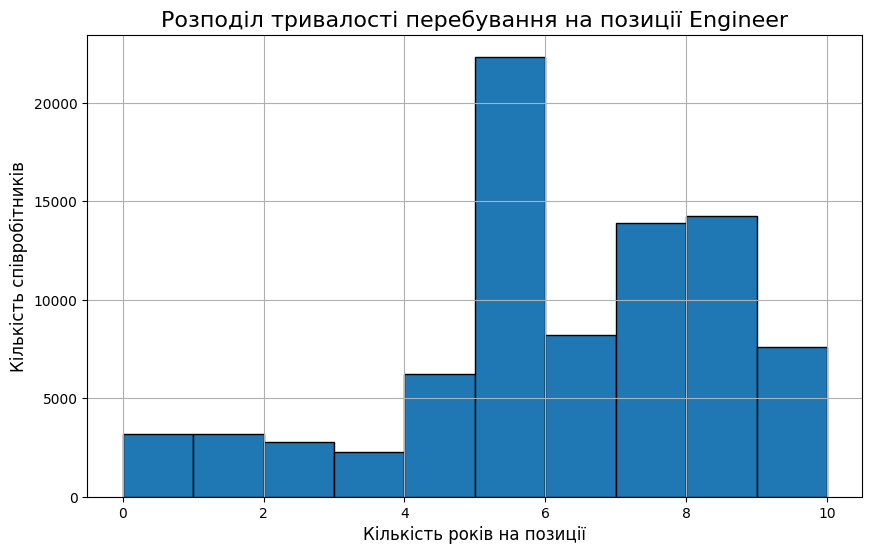

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['duration'], bins=range(0, df_years['duration'].max() + 2), edgecolor='black')

plt.title('Розподіл тривалості перебування на позиції Engineer', fontsize=16)
plt.xlabel('Кількість років на позиції', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)

plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [9]:
con.close()